In [1]:
!pip install ../SeREGen

Processing /Users/NikhilKalidasu/Documents/DNA Visualization/SeREGen/SeREGen
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for SeREGen: filename=SeREGen-0.0.12-py3-none-any.whl size=49069 sha256=6caf865ec853486a038429f87a3cab2ba9e98a39ab7625f1d281f2bd610c02f8
  Stored in directory: /private/var/folders/_t/pfxf9f7x0nz1m6vckn9glz_40000gn/T/pip-ephem-wheel-cache-d93fm8pr/wheels/c6/79/e5/431bc1fc7477a043b52c65c69a40862e34f24b12add06f2e4c
Successfully built SeREGen
  Attempting uninstall: SeREGen
    Found existing installation: SeREGen 0.0.12
    Uninstalling SeREGen-0.0.12:
      Successfully uninstalled SeREGen-0.0.12


In [2]:
import pickle
with open('edit_qiita_large_np.pkl', 'rb') as f:
    sequences, distances = pickle.load(f)

In [3]:
dense_depth = 1
seq_len = sequences['train'].shape[-1]
compress_factor = 1
conv_filters = 64
conv_kernel_size=16
attn_heads = 2

In [4]:
from SeREGen.encoders import ModelBuilder
builder = ModelBuilder((sequences['train'].shape[-1],))
builder.one_hot_encoding(4)
builder.transpose()
builder.dense(seq_len, depth=dense_depth)
builder.dense(seq_len // compress_factor)
builder.transpose()
builder.conv1D(conv_filters, conv_kernel_size, seq_len // compress_factor * 4)
builder.reshape((*builder.shape()[:-2], builder.shape()[-1] // 4, 4))
builder.attention(attn_heads, seq_len // compress_factor)

from SeREGen.comparative_encoder import ComparativeEncoder
from SeREGen.distance import EditDistance
dist = EditDistance()
model = ComparativeEncoder.from_model_builder(builder, repr_size=768, norm_type='clip',
                                              embed_dist='hyperbolic', dist=dist, loss='mse',
                                              reg_dims=True)
model.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 152)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ one_hot_encoding                │ (None, 152, 4)         │             0 │
│ (OneHotEncoding)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 152)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4, 152)         │        23,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 152)         │           608 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4, 152)         │        23,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 152)         │           608 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 152, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 137, 64)        │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 68, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4352)           │        17,408 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 608)            │     2,646,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 608)            │         2,432 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 152, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_block                 │ (None, 152, 4)         │         1,544 │
│ (AttentionBlock)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 152, 4)         │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 608)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 768)            │       467,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 768)            │         3,072 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ clip_norm (ClipNorm)            │ (None, 768)            │             

 Total params: 3,190,696 (12.17 MB)

 Trainable params: 3,178,624 (12.13 MB)

 Non-trainable params: 12,072 (47.16 KB)

In [5]:
import numpy as np
seqs = sequences['train']
distance_on = np.array(['A', 'C', 'G', 'T'])[seqs]
distance_on = np.fromiter((''.join(i) for i in distance_on), dtype=object).astype(str)

In [6]:
model.fit(256, seqs, distance_on=distance_on, epoch_factor=4, first_ep_lr=1)

Running fast first epoch...


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 243876.66it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 31s 213ms/step - loss: 0.0171
Epoch 1:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 244379.57it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - loss: 0.0195
Epoch time: 22.38160014152527
Epoch 2:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 239590.41it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - loss: 0.0159
Epoch time: 22.856986045837402
Epoch 3:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 245409.07it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - loss: 0.0150
Epoch time: 22.653131008148193
Epoch 4:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 246526.96it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - loss: 0.0133
Epoch time: 20.52915620803833
Epoch 5:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 317824.26it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 167ms/step - loss: 0.0145
Epoch time: 18.661866903305054
Epoch 6:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 313254.89it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - loss: 0.0135
Epoch time: 19.63504719734192
Epoch 7:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 317571.58it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - loss: 0.0138
Epoch time: 19.380501985549927
Epoch 8:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 319026.06it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - loss: 0.0131
Epoch time: 20.396891117095947
Epoch 9:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 307959.91it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - loss: 0.0117
Epoch time: 19.355079889297485
Epoch 10:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 311807.73it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 175ms/step - loss: 0.0107
Epoch time: 19.61781096458435
Epoch 11:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 314045.65it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 170ms/step - loss: 0.0113
Epoch time: 19.06387209892273
Epoch 12:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 309782.78it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - loss: 0.0108
Epoch time: 19.164179801940918
Epoch 13:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 311807.73it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - loss: 0.0111
Epoch time: 18.920921087265015
Epoch 14:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 314402.12it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - loss: 0.0107
Epoch time: 18.967008113861084
Epoch 15:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 311367.93it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - loss: 0.0103
Epoch time: 19.13385581970215
Epoch 16:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 312943.54it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 170ms/step - loss: 0.0103
Epoch time: 19.064876079559326
Epoch 17:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 305567.30it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 170ms/step - loss: 0.0090
Epoch time: 19.084853887557983
Epoch 18:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 309944.66it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - loss: 0.0094
Epoch time: 19.33207392692566
Epoch 19:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 312145.04it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - loss: 0.0105
Epoch time: 19.21772527694702
Epoch 20:


100%|█████████████████████████████████████████████████████████████████████████| 28000/28000 [00:00<00:00, 311742.35it/s]


110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - loss: 0.0096
Epoch time: 19.265515089035034
Stopping early due to lack of improvement!
Total time taken: 428.792268037796 seconds.


In [36]:
model.save('ultra_qual')

In [7]:
from SeREGen.comparative_encoder import ComparativeEncoder
from SeREGen.distance import EditDistance
dist = EditDistance()
model = ComparativeEncoder.load('ultra_qual')

In [8]:
encodings = model.transform(seqs, 128)
encodings_test = model.transform(sequences['test'], 128)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [9]:
distance_on_test = np.array(['A', 'C', 'G', 'T'])[sequences['test']]
distance_on_test = np.fromiter((''.join(i) for i in distance_on_test), dtype=object).astype(str)

In [10]:
from SeREGen.comparative_encoder import LinearDecoder
dec = LinearDecoder(dist=dist)
dec.fit(encodings, distance_on)
results = dec.evaluate(encodings_test, distance_on_test, sample_size=1000)

Calculating embedding distances
Calculating true distances


100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 300116.82it/s]


Calculating embedding distances
Calculating true distances


100%|███████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 304067.28it/s]

Predicting true distances...
Mean squared error of distances: 0.0009748026286383856
R-squared correlation coefficient: 0.9358256918559792


In [11]:
np.mean((results[0] - results[1]) ** 2) ** .5

0.031221829360855612

In [12]:
from scipy.stats import pearsonr
pearsonr(*results).statistic ** 2

0.9372992610536187

In [13]:
np.mean(np.abs(results[1] - results[0]))

0.02267120482975192

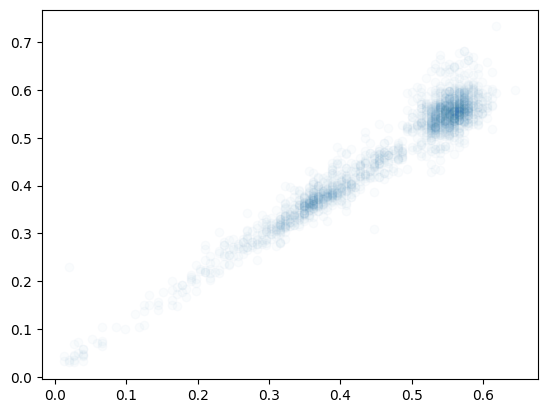

In [14]:
import matplotlib.pyplot as plt
plt.scatter(results[0], results[1], alpha=.02)
plt.show()

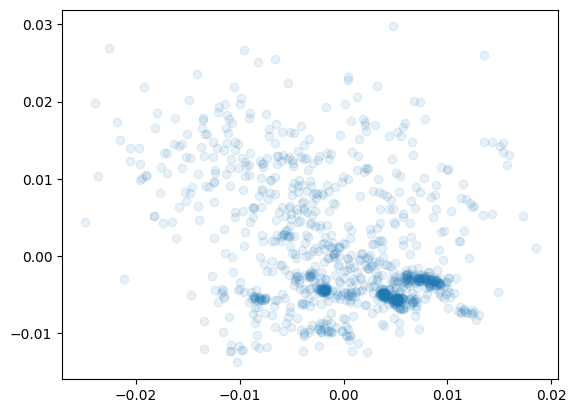

In [15]:
plt.scatter(encodings[:1000, 0], encodings[:1000, 1], alpha=.1)
plt.show()